In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
cf.go_offline()

In [2]:
data = pd.read_csv('loan_data (1).csv')

In [3]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [5]:
data.shape

(307511, 122)

In [6]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
data.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [8]:
defaulter = (data.TARGET == 1).sum()
payers = (data.TARGET ==0).sum()
print((defaulter/payers)*100)

8.781828601345662


In [9]:
without_id=[column for column in data.columns if column!='SK_ID_CURR'] 

#check for duplicate values
na=data[data.duplicated(subset=without_id,keep=False)] 
print("Duplicates are: ",na.shape[0])

Duplicates are:  0


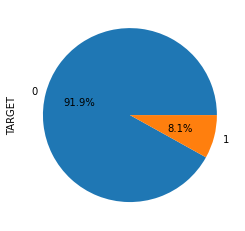

In [10]:
data.TARGET.value_counts().plot(kind = 'pie' , autopct = '%1.1f%%')
plt.show()

<AxesSubplot:ylabel='TARGET'>

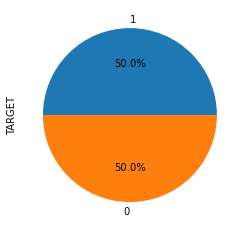

In [11]:
shuffled_data = data.sample(frac = 1 , random_state = 3)
unpaid_home_loan = shuffled_data.loc[shuffled_data['TARGET']==1]
paid_home_loan = shuffled_data.loc[shuffled_data['TARGET']==0].sample(n = 24825 , random_state = 69)
normalised_home_loan = pd.concat([unpaid_home_loan,paid_home_loan])
normalised_home_loan.TARGET.value_counts().plot(kind = 'pie' , autopct = '%1.1f%%')

In [12]:
import tensorflow as tf

In [13]:
normalised_home_loan.dropna(axis = 0)
normalised_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 121862
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB


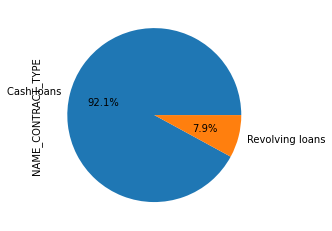

In [14]:
normalised_home_loan.NAME_CONTRACT_TYPE.value_counts().plot(kind = 'pie' , autopct = '%1.1f%%')
plt.show()

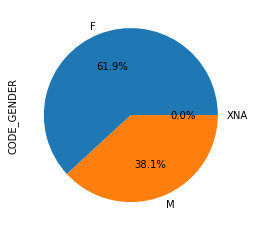

In [15]:
normalised_home_loan.CODE_GENDER.value_counts().plot(kind = 'pie' , autopct = '%1.1f%%')
plt.show()

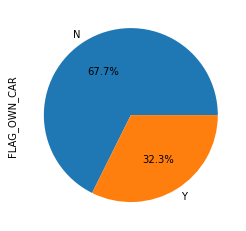

In [16]:
normalised_home_loan.FLAG_OWN_CAR.value_counts().plot(kind = 'pie' , autopct = '%1.1f%%')
plt.show()

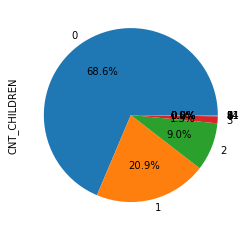

In [17]:
normalised_home_loan.CNT_CHILDREN.value_counts().plot(kind = 'pie' , autopct = '%1.1f%%')
plt.show()

In [18]:
cf.set_config_file(theme='polar')

normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL'] < 2000000]['AMT_INCOME_TOTAL'].iplot(kind='histogram', bins=100,
   xTitle = 'Total Income', yTitle ='Count of applicants',
             title='Distribution of AMT_INCOME_TOTAL')

In [19]:
(normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL']>1000000]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL'] > 1000000])*100

0    64.864865
1    35.135135
Name: TARGET, dtype: float64

In [20]:
#print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>1]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 2])*100)
print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>2]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 2])*100)
print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>5]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 5])*100) 
#as number of children is increasing lone defaulters are increasing

1    57.047872
0    42.952128
Name: TARGET, dtype: float64
1    81.818182
0    18.181818
Name: TARGET, dtype: float64


In [21]:
print((normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR']=='N']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR'] =='N'])*100)
print((normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR']=='Y']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR'] =='Y'])*100) 

#people with own cars are slighlty more likely to repay back the loan 

1    51.350064
0    48.649936
Name: TARGET, dtype: float64
0    52.823962
1    47.176038
Name: TARGET, dtype: float64


In [22]:
print((normalised_home_loan[normalised_home_loan['CODE_GENDER']=='M']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CODE_GENDER'] =='M'])*100) 
print((normalised_home_loan[normalised_home_loan['CODE_GENDER']=='F']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CODE_GENDER'] =='F'])*100) 

#men more likely to default in payment of loans

1    56.280372
0    43.719628
Name: TARGET, dtype: float64
0    53.867691
1    46.132309
Name: TARGET, dtype: float64


In [23]:
print((normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Cash loans']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Cash loans'])*100) 
print((normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Revolving loans']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Revolving loans'])*100) 

#cash loans have a higher percent of defaulters

1    50.802923
0    49.197077
Name: TARGET, dtype: float64
0    59.309995
1    40.690005
Name: TARGET, dtype: float64


In [24]:
normalised_home_loan=normalised_home_loan.sample(frac=1,random_state=5)

In [25]:
from sklearn.preprocessing import OrdinalEncoder

ordenc=OrdinalEncoder()
normalised_home_loan['NAME_CONTRACT_TYPE_CODE']=ordenc.fit_transform(normalised_home_loan[['NAME_CONTRACT_TYPE']]) 
print(normalised_home_loan[['NAME_CONTRACT_TYPE','NAME_CONTRACT_TYPE_CODE']].head(20))
print(normalised_home_loan['NAME_CONTRACT_TYPE_CODE'].value_counts())

       NAME_CONTRACT_TYPE  NAME_CONTRACT_TYPE_CODE
302218         Cash loans                      0.0
167526         Cash loans                      0.0
159305         Cash loans                      0.0
275427         Cash loans                      0.0
8837           Cash loans                      0.0
192094         Cash loans                      0.0
235115    Revolving loans                      1.0
79051          Cash loans                      0.0
123267    Revolving loans                      1.0
5517           Cash loans                      0.0
128624         Cash loans                      0.0
187583         Cash loans                      0.0
143193         Cash loans                      0.0
288269         Cash loans                      0.0
44320          Cash loans                      0.0
256898         Cash loans                      0.0
118237         Cash loans                      0.0
5980      Revolving loans                      1.0
96475          Cash loans      

In [26]:
normalised_home_loan['CODE_GENDER_CODE']=ordenc.fit_transform(normalised_home_loan[['CODE_GENDER']]) 
print(normalised_home_loan[['CODE_GENDER','CODE_GENDER_CODE']].head(20))
print(normalised_home_loan['CODE_GENDER_CODE'].value_counts())

       CODE_GENDER  CODE_GENDER_CODE
302218           M               1.0
167526           F               0.0
159305           M               1.0
275427           F               0.0
8837             M               1.0
192094           M               1.0
235115           F               0.0
79051            F               0.0
123267           M               1.0
5517             F               0.0
128624           M               1.0
187583           F               0.0
143193           M               1.0
288269           F               0.0
44320            F               0.0
256898           F               0.0
118237           F               0.0
5980             M               1.0
96475            F               0.0
249976           F               0.0
0.0    30716
1.0    18932
2.0        2
Name: CODE_GENDER_CODE, dtype: int64


In [27]:
#2 other values in code_gender
normalised_home_loan.loc[normalised_home_loan['CODE_GENDER_CODE']==2]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_CODE,CODE_GENDER_CODE
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,2.0


In [28]:
normalised_home_loan['FLAG_OWN_CAR_CODE']=ordenc.fit_transform(normalised_home_loan[['FLAG_OWN_CAR']]) 
print(normalised_home_loan[['FLAG_OWN_CAR','FLAG_OWN_CAR_CODE']].head(20))
print(normalised_home_loan['FLAG_OWN_CAR_CODE'].value_counts())

       FLAG_OWN_CAR  FLAG_OWN_CAR_CODE
302218            N                0.0
167526            N                0.0
159305            N                0.0
275427            N                0.0
8837              N                0.0
192094            N                0.0
235115            N                0.0
79051             N                0.0
123267            N                0.0
5517              N                0.0
128624            N                0.0
187583            N                0.0
143193            N                0.0
288269            Y                1.0
44320             Y                1.0
256898            N                0.0
118237            N                0.0
5980              Y                1.0
96475             N                0.0
249976            N                0.0
0.0    33591
1.0    16059
Name: FLAG_OWN_CAR_CODE, dtype: int64


In [29]:
normalised_home_loan['CNT_CHILDREN_CODE']=ordenc.fit_transform(normalised_home_loan[['CNT_CHILDREN']]) 
print(normalised_home_loan[['CNT_CHILDREN_CODE','CNT_CHILDREN']].head(20))
print(normalised_home_loan['CNT_CHILDREN_CODE'].value_counts())

        CNT_CHILDREN_CODE  CNT_CHILDREN
302218                0.0             0
167526                0.0             0
159305                2.0             2
275427                0.0             0
8837                  0.0             0
192094                0.0             0
235115                0.0             0
79051                 0.0             0
123267                1.0             1
5517                  0.0             0
128624                0.0             0
187583                1.0             1
143193                0.0             0
288269                0.0             0
44320                 0.0             0
256898                0.0             0
118237                2.0             2
5980                  0.0             0
96475                 0.0             0
249976                0.0             0
0.0     34073
1.0     10381
2.0      4444
3.0       642
4.0        89
5.0        10
6.0         6
8.0         2
9.0         1
10.0        1
7.0         1
Name: 

In [30]:
normalised_home_loan=normalised_home_loan.sample(frac=1,random_state=45)

In [31]:
normalised_home_loan['TARGET'].value_counts()

0    24825
1    24825
Name: TARGET, dtype: int64

In [32]:
y=normalised_home_loan.TARGET 

In [33]:
normalised_home_loan_features=['NAME_CONTRACT_TYPE_CODE','CNT_CHILDREN_CODE','FLAG_OWN_CAR_CODE','CODE_GENDER_CODE']

In [34]:
from sklearn.model_selection import train_test_split
X=normalised_home_loan[normalised_home_loan_features] 

In [35]:
from sklearn.datasets import make_blobs
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 49650

# Generate data
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)

X_train,X_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.33,random_state=45)

In [36]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33265, 2) (16385, 2) (33265,) (16385,)


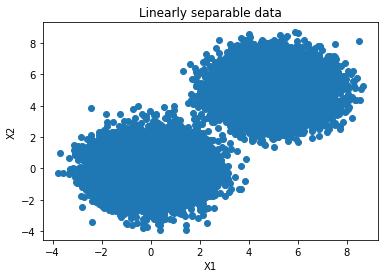

In [37]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [38]:
from sklearn import svm 
from sklearn.metrics import plot_confusion_matrix

In [39]:
from sklearn.svm import SVC 

In [40]:
clf=SVC(kernel='linear')
clf=clf.fit(X_train,y_train)

C:\Users\INDIA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



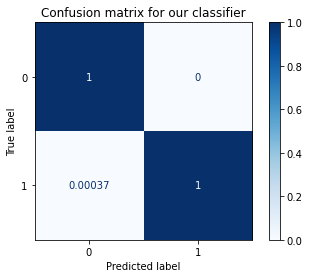

In [41]:
predictions = clf.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [42]:
from sklearn.metrics import precision_score, recall_score,f1_score
print(precision_score(y_test, predictions))
print(recall_score(y_test, predictions)) 
print(f1_score(y_test,predictions,average=None))

1.0
0.999633072407045
[0.99981731 0.9998165 ]


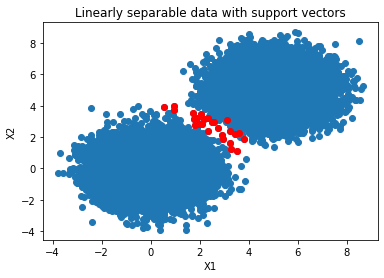

In [43]:
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

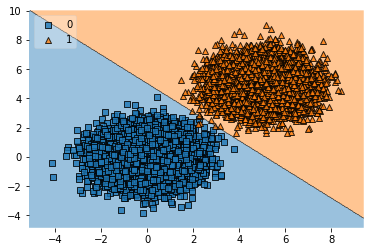

In [44]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, clf=clf, legend=2)
plt.show()

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [47]:
model = Sequential()

model.add(
        Dense(94, activation='relu')
)

model.add(
        Dense(30, activation='relu')
)

model.add(
        Dense(15, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

In [48]:
early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
136/136 [==============================] - 4s 13ms/step - loss: 0.6852 - accuracy: 0.5494 - val_loss: 0.6842 - val_accuracy: 0.5514
Epoch 2/200
136/136 [==============================] - 1s 10ms/step - loss: 0.6826 - accuracy: 0.5587 - val_loss: 0.6827 - val_accuracy: 0.5632
Epoch 3/200
136/136 [==============================] - 1s 9ms/step - loss: 0.6825 - accuracy: 0.5589 - val_loss: 0.6834 - val_accuracy: 0.5631
Epoch 4/200
136/136 [==============================] - 1s 9ms/step - loss: 0.6823 - accuracy: 0.5607 - val_loss: 0.6825 - val_accuracy: 0.5631
Epoch 5/200
136/136 [==============================] - 1s 8ms/step - loss: 0.6823 - accuracy: 0.5604 - val_loss: 0.6825 - val_accuracy: 0.5632
Epoch 6/200
136/136 [==============================] - 1s 9ms/step - loss: 0.6822 - accuracy: 0.5608 - val_loss: 0.6825 - val_accuracy: 0.5631
Epoch 7/200
136/136 [==============================] - 1s 8ms/step - loss: 0.6822 - accuracy: 0.5593 - val_loss: 0.6825 - val_accuracy: 0.56

<AxesSubplot:>

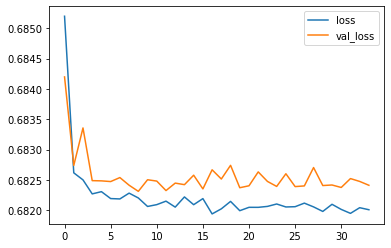

In [49]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot() #over fitting 

In [54]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
classes_x=np.argmax(predictions,axis=1)

print(
        confusion_matrix(y_test,predictions), 
        '\n', 
        classification_report(y_test,predictions)
)

[[4373 3124]
 [3384 4014]] 
               precision    recall  f1-score   support

           0       0.56      0.58      0.57      7497
           1       0.56      0.54      0.55      7398

    accuracy                           0.56     14895
   macro avg       0.56      0.56      0.56     14895
weighted avg       0.56      0.56      0.56     14895



In [55]:
model_new = Sequential()

model_new.add(
        Dense(94, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(30, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(15, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
136/136 [==============================] - 5s 16ms/step - loss: 0.6876 - binary_accuracy: 0.5470 - val_loss: 0.6831 - val_binary_accuracy: 0.5630
Epoch 2/200
136/136 [==============================] - 2s 12ms/step - loss: 0.6847 - binary_accuracy: 0.5559 - val_loss: 0.6829 - val_binary_accuracy: 0.5631
Epoch 3/200
136/136 [==============================] - 2s 12ms/step - loss: 0.6843 - binary_accuracy: 0.5576 - val_loss: 0.6828 - val_binary_accuracy: 0.5633
Epoch 4/200
136/136 [==============================] - 2s 13ms/step - loss: 0.6839 - binary_accuracy: 0.5597 - val_loss: 0.6831 - val_binary_accuracy: 0.5630
Epoch 5/200
136/136 [==============================] - 2s 12ms/step - loss: 0.6839 - binary_accuracy: 0.5592 - val_loss: 0.6826 - val_binary_accuracy: 0.5630
Epoch 6/200
136/136 [==============================] - 2s 13ms/step - loss: 0.6838 - binary_accuracy: 0.5564 - val_loss: 0.6828 - val_binary_accuracy: 0.5629
Epoch 7/200
136/136 [==============================]

<AxesSubplot:>

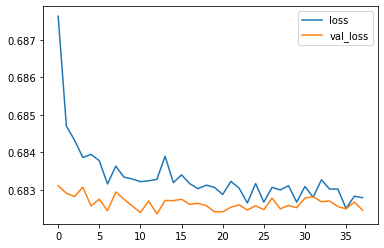

In [56]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() 
#The graph shows that, by adding in Dropout layers, we have reduced the overfitting i

In [63]:
def predict_prob(number):
    return [number[0],1-number[0]]

y_prob = np.array(list(map(predict_prob, model.predict(X_test))))
y_prob

array([[0.56545007, 0.43454993],
       [0.52653593, 0.47346407],
       [0.39029568, 0.60970432],
       ...,
       [0.35000873, 0.64999127],
       [0.47854802, 0.52145198],
       [0.60408175, 0.39591825]])